In [1]:
import numpy as np

arr = np.array([1, 2, 3])
print(arr.mean())  # Output: 2.0


2.0


In [2]:
import numpy as np

arr = np.array([1, 2, 3, 6, 4])
x = arr.mean()
y = arr.sum()
z = np.sort(arr) 
print(f"The mean value is {x:.2f}\nThe summation is {y:.2f}\nThe sorted list is {z}")


The mean value is 3.20
The summation is 16.00
The sorted list is [1 2 3 4 6]


Data Cleaning and Preparation

In [3]:
import pandas as pd

upload_file = pd.read_csv('C:/Users/JOHN PAUL/Desktop/otic/credit_risk_dataset.csv')

In [4]:
print("\nHere is a snippet of the Dataframe")
print(upload_file.head())

print("\nDescription statistics of the dataset")
print(upload_file.describe())

print("\nThe shape of the dataset")
print(upload_file.shape)


Here is a snippet of the Dataframe
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                     

In [5]:
print(upload_file['person_age'].mean())

27.73459992019889


In [6]:
print(upload_file.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [ ]:
print(upload_file.columns)

print(upload_file.info())
# 

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 3258

In [8]:
print(upload_file.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Preparing Data for Modeling

Train - Test - Split

In [9]:
from sklearn.model_selection import train_test_split

X = upload_file.drop("loan_status", axis=1)
y = upload_file["loan_status"]

# print(X)

# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30, stratify=y)


In [10]:
print(f"Training factors shape: {X_train.shape}")
print(f"Testing factors shape: {X_test.shape}")
print(f"Training outcome shape: {y_train.shape}")
print(f"Testing outcome shape: {y_test.shape}")

Training factors shape: (26064, 11)
Testing factors shape: (6517, 11)
Training outcome shape: (26064,)
Testing outcome shape: (6517,)


data cleaning

In [11]:
print("Count of Missing Values in X_train")
print(X_train.isnull().sum())

print(
    "Percentage missing values"
)

print((X_train.isnull().sum()/len(X_train))*100)

Count of Missing Values in X_train
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              717
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2516
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
Percentage missing values
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.750921
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.653161
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [12]:
median1 = X_train['person_emp_length'].median()

median2 = X_train['loan_int_rate'].median()

print(median1)
print(median2)

4.0
10.99


In [13]:
# columns = X_train['person_emp_length', 'loan_int_rate']

X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

X_train_imputed["person_emp_length"] = X_train_imputed["person_emp_length"].fillna(median1)
X_train_imputed["loan_int_rate"] = X_train_imputed["loan_int_rate"].fillna(median2)

print(X_train_imputed['loan_int_rate'].isnull().sum())


0


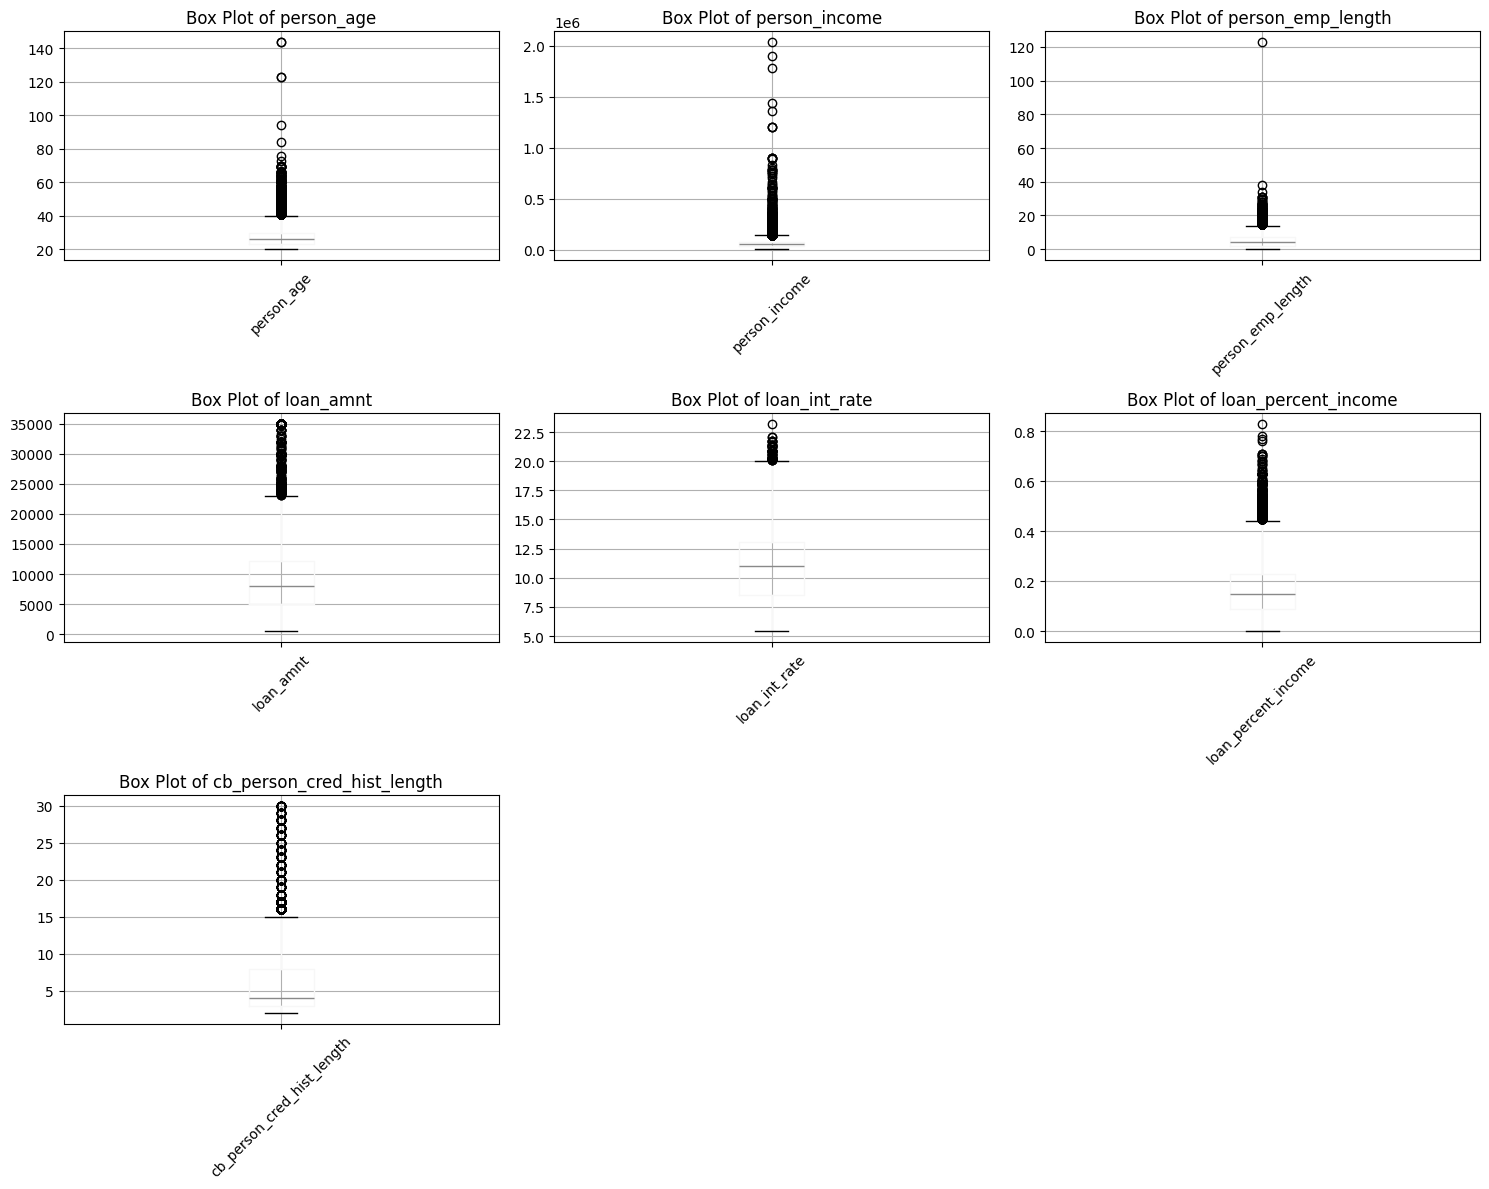

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create box plots for numerical columns to identify outliers
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        X_train_imputed.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].tick_params(axis='x', rotation=45)

# Hide the last two empty subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [16]:
def detect_outliers_iqr(df, column):
    """
    Detect outliers using the Interquartile Range (IQR) method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Detect outliers for each numerical column
outlier_summary = {}

for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(X_train_imputed, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(X_train_imputed)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({(len(outliers)/len(X_train_imputed)*100):.2f}%)")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Min value: {X_train_imputed[col].min():.2f}")
    print(f"  Max value: {X_train_imputed[col].max():.2f}")



person_age:
  Outliers: 1202 (4.61%)
  Lower bound: 12.50
  Upper bound: 40.50
  Min value: 20.00
  Max value: 144.00

person_income:
  Outliers: 1199 (4.60%)
  Lower bound: -22333.12
  Upper bound: 140599.88
  Min value: 4000.00
  Max value: 2039784.00

person_emp_length:
  Outliers: 698 (2.68%)
  Lower bound: -5.50
  Upper bound: 14.50
  Min value: 0.00
  Max value: 123.00

loan_amnt:
  Outliers: 1350 (5.18%)
  Lower bound: -5875.00
  Upper bound: 23125.00
  Min value: 500.00
  Max value: 35000.00

loan_int_rate:
  Outliers: 53 (0.20%)
  Lower bound: 1.56
  Upper bound: 20.04
  Min value: 5.42
  Max value: 23.22

loan_percent_income:
  Outliers: 512 (1.96%)
  Lower bound: -0.12
  Upper bound: 0.44
  Min value: 0.00
  Max value: 0.83

cb_person_cred_hist_length:
  Outliers: 907 (3.48%)
  Lower bound: -4.50
  Upper bound: 15.50
  Min value: 2.00
  Max value: 30.00


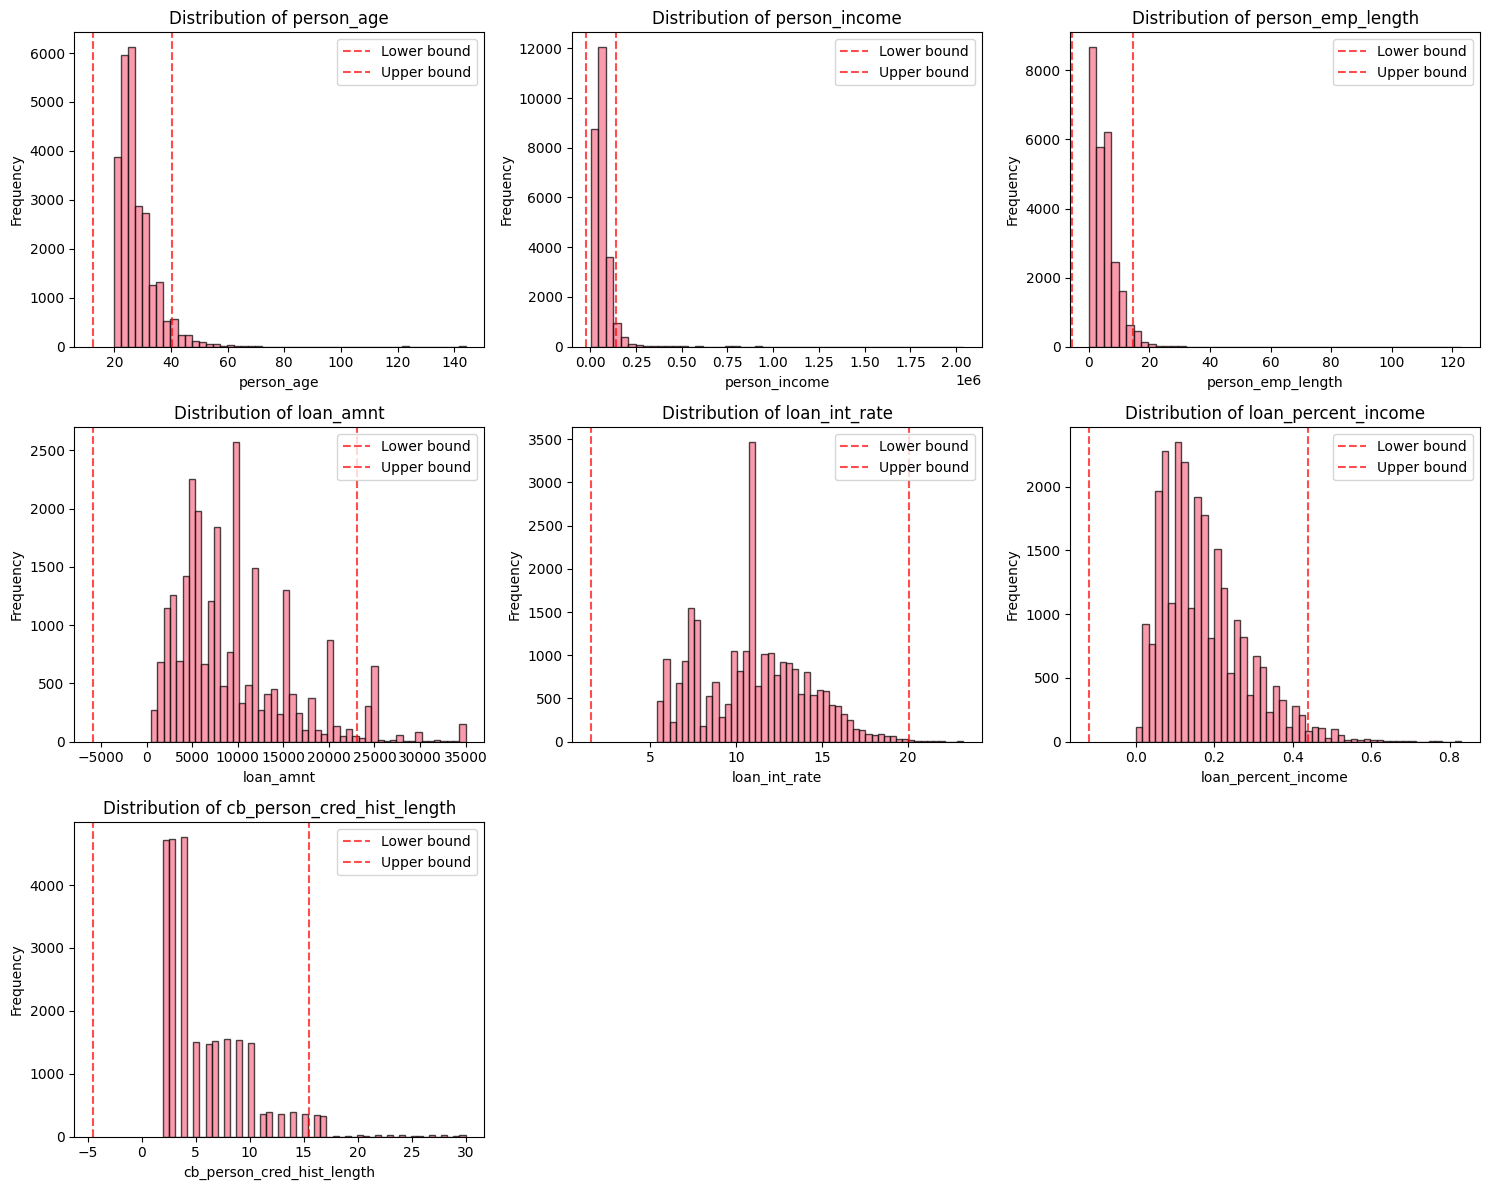

In [17]:
# Create histograms to visualize the distribution and outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].hist(X_train_imputed[col], bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        
        # Add vertical lines for outlier bounds
        outliers, lower_bound, upper_bound = detect_outliers_iqr(X_train_imputed, col)
        axes[i].axvline(lower_bound, color='red', linestyle='--', alpha=0.7, label='Lower bound')
        axes[i].axvline(upper_bound, color='red', linestyle='--', alpha=0.7, label='Upper bound')
        axes[i].legend()

# Hide empty subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [18]:
# Let's look at some specific extreme cases
print("=== EXTREME OUTLIERS ANALYSIS ===\n")

# Person age outliers (people over 100)
age_outliers = X_train_imputed[X_train_imputed['person_age'] > 100]
print(f"People over 100 years old: {len(age_outliers)}")
if len(age_outliers) > 0:
    print(f"Age range: {age_outliers['person_age'].min()} - {age_outliers['person_age'].max()}")

# Income outliers (very high income)
income_outliers = X_train_imputed[X_train_imputed['person_income'] > 1000000]
print(f"\nPeople with income > $1M: {len(income_outliers)}")
if len(income_outliers) > 0:
    print(f"Income range: ${income_outliers['person_income'].min():,} - ${income_outliers['person_income'].max():,}")

# Employment length outliers
emp_outliers = X_train_imputed[X_train_imputed['person_emp_length'] > 50]
print(f"\nPeople with employment > 50 years: {len(emp_outliers)}")
if len(emp_outliers) > 0:
    print(f"Employment range: {emp_outliers['person_emp_length'].min()} - {emp_outliers['person_emp_length'].max()} years")


=== EXTREME OUTLIERS ANALYSIS ===

People over 100 years old: 4
Age range: 123 - 144

People with income > $1M: 8
Income range: $1,200,000 - $2,039,784

People with employment > 50 years: 1
Employment range: 123.0 - 123.0 years


In [19]:
def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Remove outliers using IQR method for specified columns
    """
    df_clean = df.copy()
    removed_indices = set()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Find outlier indices
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        removed_indices.update(outlier_indices)
        
        print(f"{col}: Removing {len(outlier_indices)} outliers")
    
    # Remove all outlier indices
    df_clean = df_clean.drop(removed_indices)
    print(f"\nTotal unique outliers removed: {len(removed_indices)}")
    print(f"Original dataset size: {len(df)}")
    print(f"Cleaned dataset size: {len(df_clean)}")
    print(f"Percentage removed: {(len(removed_indices)/len(df)*100):.2f}%")
    
    return df_clean, removed_indices

# Method 1: Remove outliers using IQR method
columns_to_clean = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate']

X_train_no_outliers, removed_indices = remove_outliers_iqr(X_train_imputed, columns_to_clean)

# Also remove corresponding y values
y_train_no_outliers = y_train.drop(removed_indices)

print(f"\nFinal training set shape: {X_train_no_outliers.shape}")
print(f"Final training labels shape: {y_train_no_outliers.shape}")


person_age: Removing 1202 outliers
person_income: Removing 1199 outliers
person_emp_length: Removing 698 outliers
loan_amnt: Removing 1350 outliers
loan_int_rate: Removing 53 outliers

Total unique outliers removed: 3804
Original dataset size: 26064
Cleaned dataset size: 22260
Percentage removed: 14.59%

Final training set shape: (22260, 11)
Final training labels shape: (22260,)


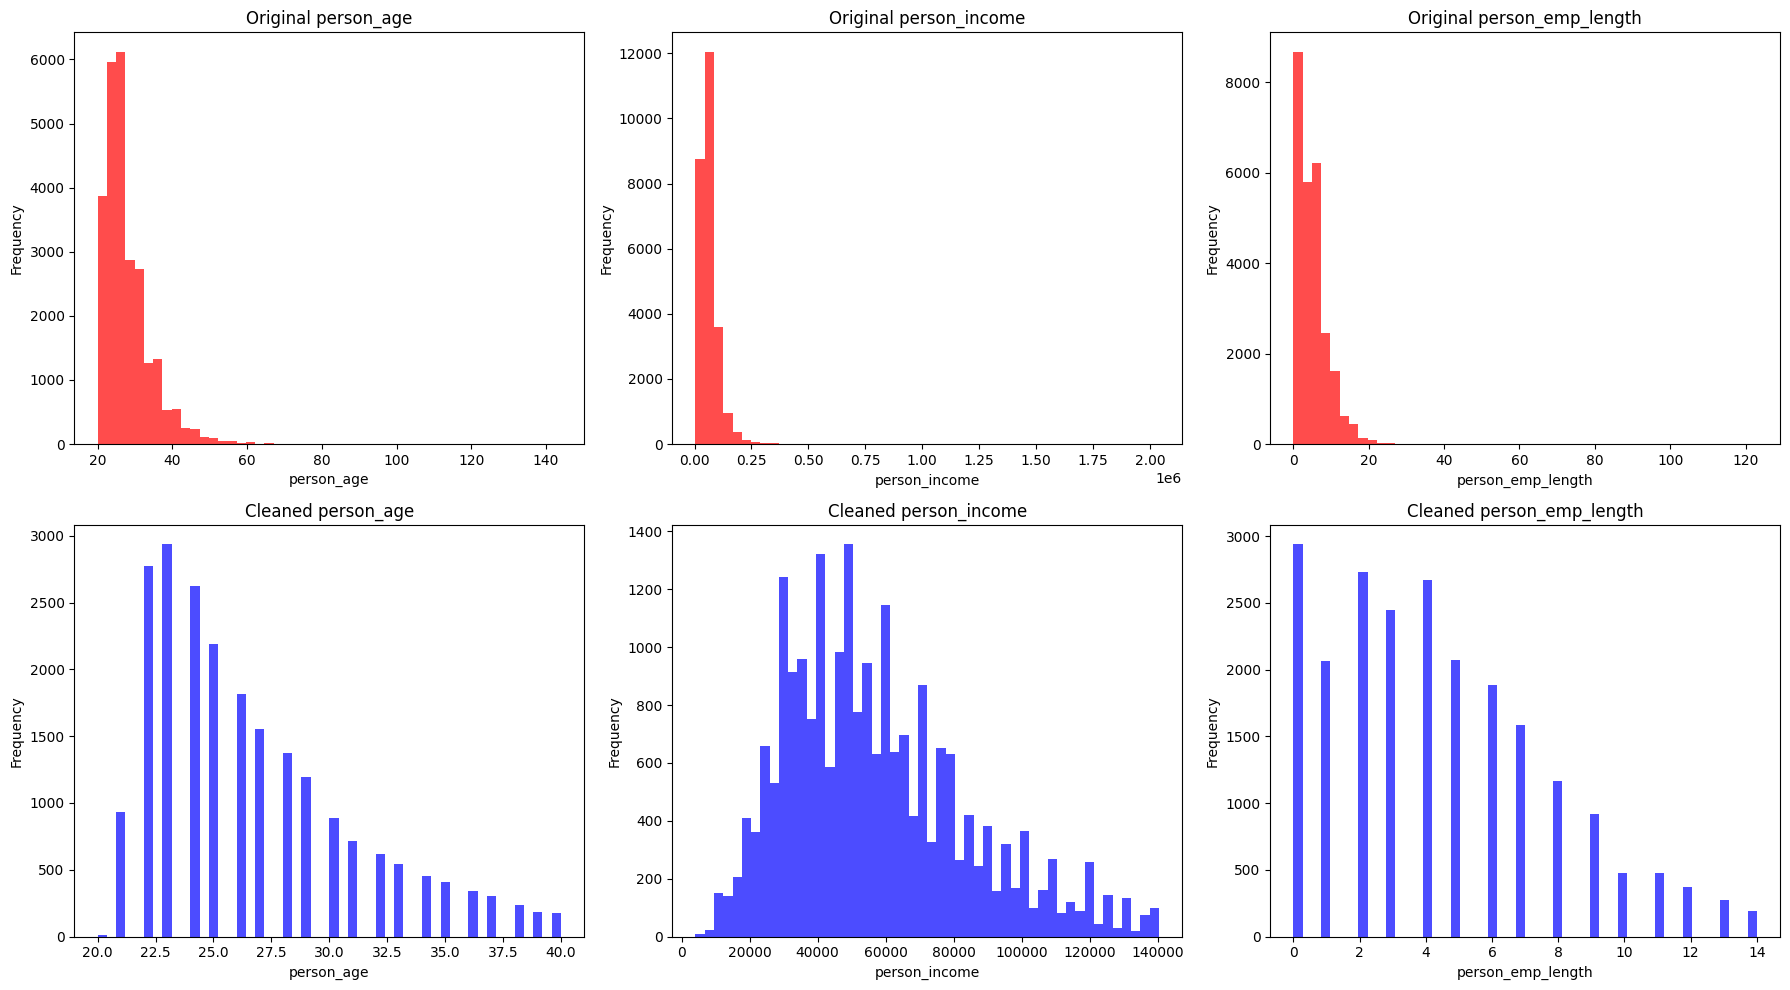

=== COMPARISON SUMMARY ===

person_age:
Original - Mean: 27.75, Std: 6.35
Cleaned  - Mean: 26.55, Std: 4.40

person_income:
Original - Mean: 66124.18, Std: 53973.98
Cleaned  - Mean: 57124.03, Std: 26806.42

person_emp_length:
Original - Mean: 4.78, Std: 4.07
Cleaned  - Mean: 4.34, Std: 3.34


In [20]:
# Compare original vs cleaned data
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

comparison_cols = ['person_age', 'person_income', 'person_emp_length']

for i, col in enumerate(comparison_cols):
    # Original data
    axes[0, i].hist(X_train_imputed[col], bins=50, alpha=0.7, color='red', label='Original')
    axes[0, i].set_title(f'Original {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    
    # Cleaned data
    axes[1, i].hist(X_train_no_outliers[col], bins=50, alpha=0.7, color='blue', label='Cleaned')
    axes[1, i].set_title(f'Cleaned {col}')
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics comparison
print("=== COMPARISON SUMMARY ===")
for col in comparison_cols:
    print(f"\n{col}:")
    print(f"Original - Mean: {X_train_imputed[col].mean():.2f}, Std: {X_train_imputed[col].std():.2f}")
    print(f"Cleaned  - Mean: {X_train_no_outliers[col].mean():.2f}, Std: {X_train_no_outliers[col].std():.2f}")


In [24]:
# Step 1: Define all necessary functions
def detect_outliers_iqr(df, column):
    """
    Detect outliers using the Interquartile Range (IQR) method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Remove outliers using IQR method for specified columns
    """
    df_clean = df.copy()
    removed_indices = set()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Find outlier indices
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        removed_indices.update(outlier_indices)
        
        print(f"{col}: Removing {len(outlier_indices)} outliers")
    
    # Remove all outlier indices
    df_clean = df_clean.drop(removed_indices)
    print(f"\nTotal unique outliers removed: {len(removed_indices)}")
    print(f"Original dataset size: {len(df)}")
    print(f"Cleaned dataset size: {len(df_clean)}")
    print(f"Percentage removed: {(len(removed_indices)/len(df)*100):.2f}%")
    
    return df_clean, removed_indices

def cap_outliers(df, columns, method='iqr', multiplier=1.5):
    """
    Cap outliers instead of removing them
    """
    df_capped = df.copy()
    
    for col in columns:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
        
        elif method == 'percentile':
            lower_bound = df[col].quantile(0.05)  # 5th percentile
            upper_bound = df[col].quantile(0.95)  # 95th percentile
        
        # Cap the values
        original_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
        
        print(f"{col}: Capped {original_outliers} outliers")
        print(f"  Range: {lower_bound:.2f} to {upper_bound:.2f}")
    
    return df_capped

# Define columns to clean
columns_to_clean = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate']
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

print("All functions and variables defined successfully!")


All functions and variables defined successfully!
